mimic3d.csv consists of 28 variables all relating to a patients stay within the hospital. Including but not limited to aspects regarding a patients genetics, to the input states for the hospital, to the types of processes the patients underwent. 

| Name             | Variable Type | Notes                                   |
|------------------|---------------|-----------------------------------------|
| hadm_id          | integer        | Unique hospital admission ID           |
| LOSdays          | float          | Length of stay in days (Emergency, Elective, Newborn)  |
| LOSgroupNum      | integer        | Length of stay grouped into categories |

These data points can be classified into three distinct categories. Each of these will be explored as a collection with the goal of finding insights into the length of the stay for each patient. 

1. Precursor Data
Each patients arrives to the hospital in a given state. Each patient is assigned a gender, age, marital status, etc. These are data points which cannot be controlled by the hospital, and as such we can make no recommendations of action. Figure (NUMBER) below shows proportions of patients who posses each attribute. Thanks in part to the central limit theorem, the majority of the distributions shown in figure (Number) are normally distributed. 

To summarize:
- Roughly 56% of patients identify as men while 44% identify as women
- The vast majority of patients identify with white 70%, 9% Black, 3.5% Hispanic, 3.3% Asian, 10% Unavailable, and 2% Other
- 35% of patients are Catholic, and 35% are not specified or null
- admit type, location, diagnosis, insurance

| Name | Variable Type | Description |
| --- | --- | --- |
| gender | char | Gender expressed as M or F |
| age | integer | Age of patient expressed at integer |
| insurance | string | Self paid, Private, Medicaid or Medicare |
| religion | string | Self identified religion of patient |
| marital_status | string | Self identified stats (Divorced, Single, Married, etc) |
| ethnicicity | string | Reorganzied to Categories White, Black, Asain, Hispanic, Other and Unavaliable |


(Compare to US Senus Data)

2. Geographical Data
Each hospital is located in different parts of the United States, and will be pushed by different factors due to that location. Further more each patient will be inducted into different parts of the hospital. A patient entering emerge will have a different experience to those entering newborn. 

| Name | Variable Type | Description |
| --- | --- | --- |
| admit_type | string | Categorized addmission as - Emergency, Elective, Newborn Urgent |
| admit_location | string | Physical location the patient was admitted to (Ex. Transfer from HOSP/Extram) |
| 


3. Variable Data
This is data that in some conceivable way could change via workflow changes within the hospital. The number of labs for instance. It is possible that every hospital currently operates with the utmost efficiency with no wasted lab results. This is incredibly unlikely however, especially when excessive lab assessment's lengthen the stay of the patient. What will be shown later in this report is a statistical approach to which variables may be of higher importance to the length of each patients stay. Figure (Number) below shows the distribution of these variable data markers. 

| Name | Variable Type | Description |
| --- | --- | --- |
| AdmitDiagnosis | string | Diagnosis upon admission |
| NumCallouts | integer | Number of clinicians *called out* of their working hours |
| NumDiagnosis| integer | Number of diagnoses |
| NumProcs         | integer        | Number of procedures                   |
| AdmitProcedure   | string         | Procedure performed upon admission     |
| NumCPTevents     | integer        | Number of CPT-coded events             |
| NumInput         | integer        | Number of inputs (e.g., fluids)        |
| NumLabs          | integer        | Number of lab tests performed          |
| NumMicroLabs     | integer        | Number of microbiology lab tests       |
| NumNotes         | integer        | Number of clinical notes               |
| NumOutput        | integer        | Number of outputs (e.g., urine)        |
| NumRx            | integer        | Number of prescribed medications       |
| NumProcEvents    | integer        | Number of procedure events             |
| NumTransfers     | integer        | Number of patient transfers            |
| NumChartEvents   | integer        | Number of charted events               |
| ExpiredHospital  | boolean        | Whether the patient died in hospital |
| TotalNumInteract | integer        | Total number of interactions           |




# GO OFF OF [MIMIC Website](https://mimic.mit.edu/docs/iii/tables/admissions/)
EXTRAM - Expanded trauma

In [19]:
import pandas as pd

df = pd.read_csv('../data-p2/mimic3d.csv')


In [4]:
df['LOSdays'].describe()

count    58976.000000
mean        10.114955
std         12.456231
min          0.000000
25%          3.710000
50%          6.460000
75%         11.790000
max        294.630000
Name: LOSdays, dtype: float64

In [23]:
df['religion'].value_counts('F')

religion
CATHOLIC                  0.352131
NOT SPECIFIED             0.200844
UNOBTAINABLE              0.141307
PROTESTANT QUAKER         0.121911
JEWISH                    0.090810
OTHER                     0.046071
EPISCOPALIAN              0.013227
GREEK ORTHODOX            0.007844
CHRISTIAN SCIENTIST       0.007331
BUDDHIST                  0.004563
MUSLIM                    0.003845
JEHOVAH'S WITNESS         0.002375
UNITARIAN-UNIVERSALIST    0.002119
HINDU                     0.001931
ROMANIAN EAST. ORTH       0.001418
7TH DAY ADVENTIST         0.001384
BAPTIST                   0.000478
HEBREW                    0.000273
METHODIST                 0.000120
LUTHERAN                  0.000017
Name: proportion, dtype: float64

In [20]:
ethnicity_mapping = {
    "ASIAN": "ASIAN",
    "ASIAN - ASIAN INDIAN": "ASIAN",
    "ASIAN - CAMBODIAN": "ASIAN",
    "ASIAN - CHINESE": "ASIAN",
    "ASIAN - FILIPINO": "ASIAN",
    "ASIAN - KOREAN": "ASIAN",
    "ASIAN - OTHER": "ASIAN",
    "ASIAN - VIETNAMESE": "ASIAN",
    "BLACK/AFRICAN AMERICAN": "BLACK",
    "BLACK/CAPE VERDEAN": "BLACK",
    "BLACK/HAITIAN": "BLACK",
    "CARIBBEAN ISLAND": "OTHER",
    "HISPANIC OR LATINO": "HISPANIC",
    "HISPANIC/LATINO - CUBAN": "HISPANIC",
    "HISPANIC/LATINO - DOMINICAN": "HISPANIC",
    "HISPANIC/LATINO - GUATEMALAN": "HISPANIC",
    "HISPANIC/LATINO - MEXICAN": "HISPANIC",
    "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC",
    "MIDDLE EASTERN": "OTHER",
    "MULTI RACE ETHNICITY": "OTHER",
    "OTHER": "OTHER",
    "PATIENT DECLINED TO ANSWER": "UNAVAILABLE",
    "PORTUGUESE": "OTHER",
    "SOUTH AMERICAN": "OTHER",
    "UNABLE TO OBTAIN": "UNAVAILABLE",
    "UNKNOWN/NOT SPECIFIED": "UNAVAILABLE",
    "WHITE": "WHITE",
    "WHITE - BRAZILIAN": "WHITE",
    "WHITE - EASTERN EUROPEAN": "WHITE",
    "WHITE - OTHER EUROPEAN": "WHITE",
    "WHITE - RUSSIAN": "WHITE"
}


df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

df['ethnicity'].value_counts('F')

ethnicity
WHITE          0.702758
UNAVAILABLE    0.100265
BLACK          0.097629
HISPANIC       0.035423
ASIAN          0.033943
OTHER          0.029981
Name: proportion, dtype: float64

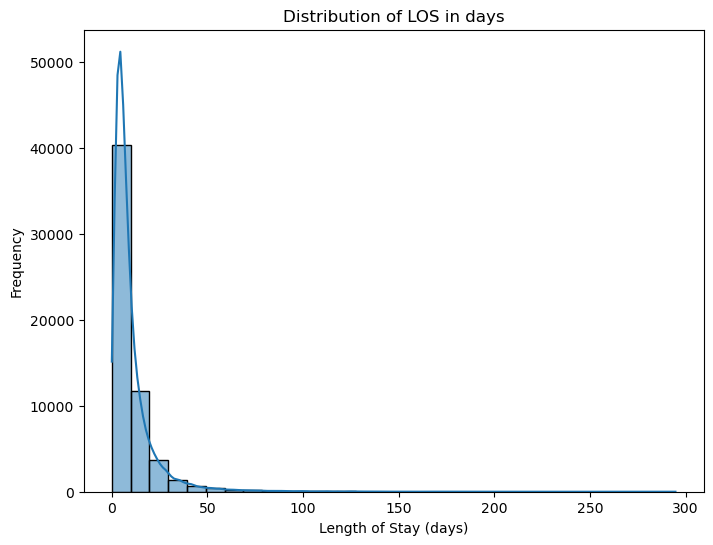

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['LOSdays'], bins=30, kde=True)
plt.title('Distribution of LOS in days')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# Understanding the Rest of the Data

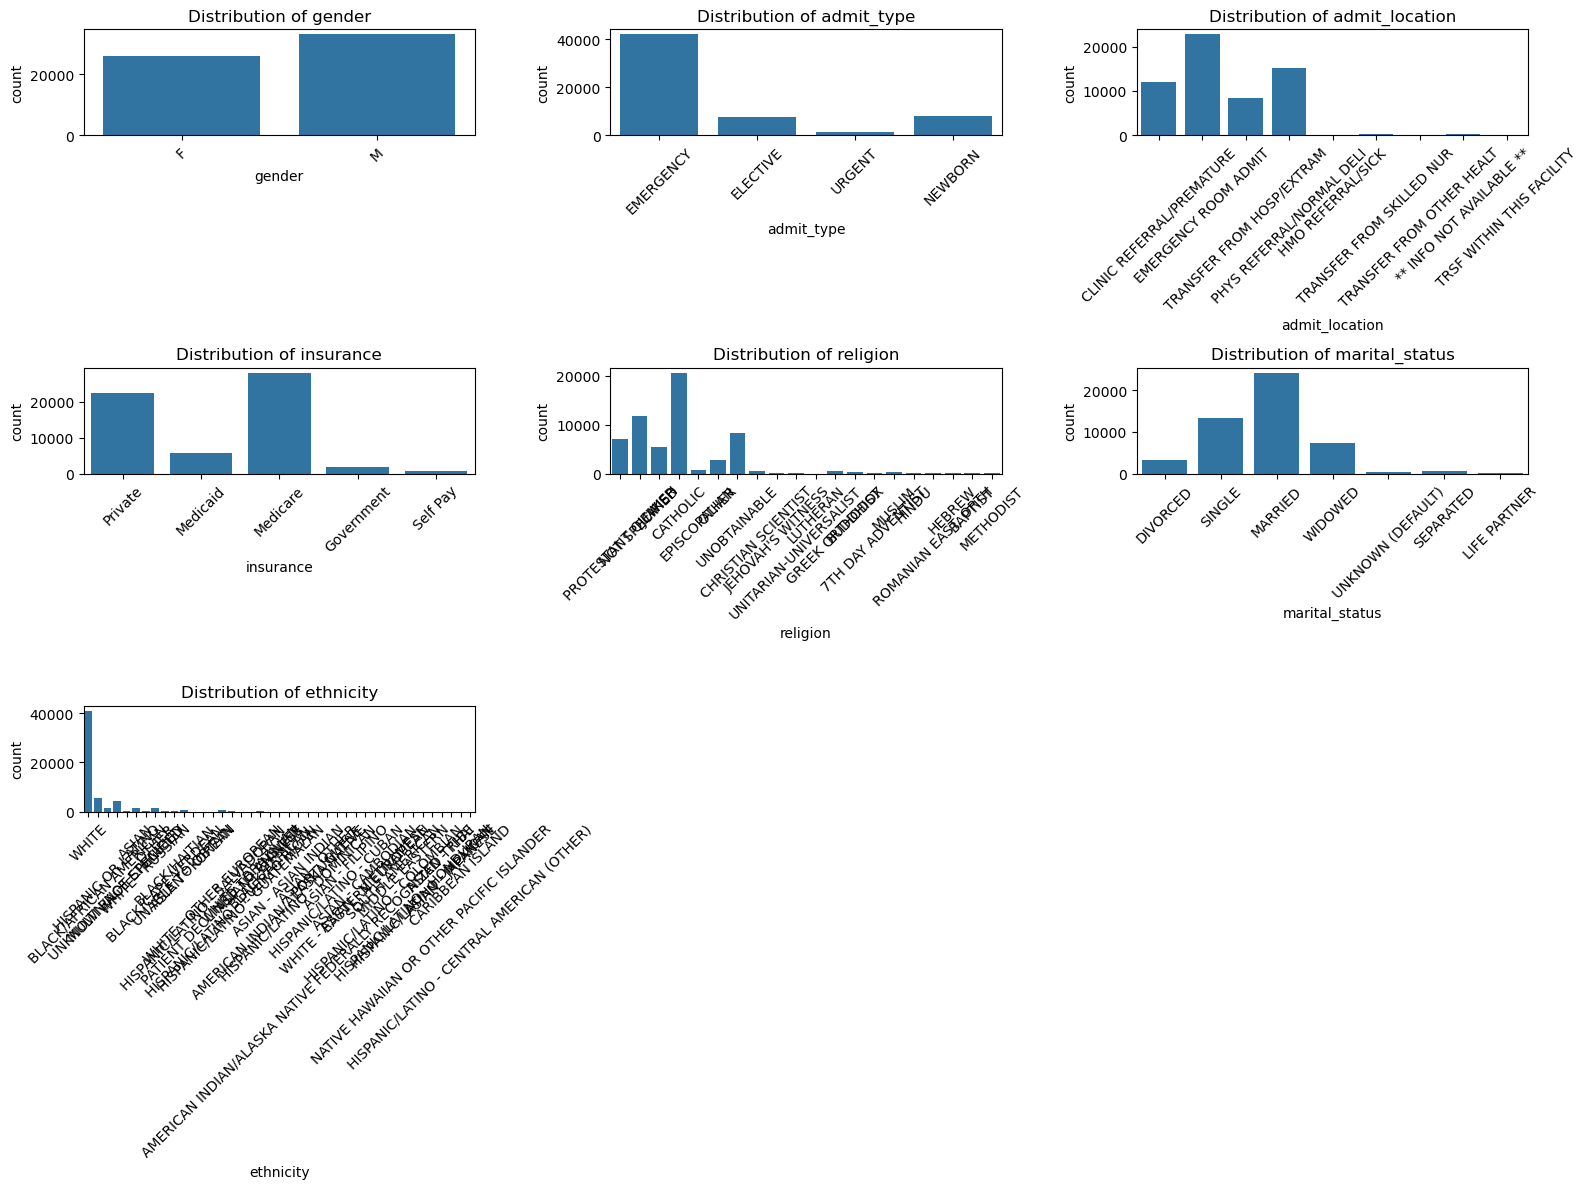

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot categorical variables
categorical_cols = ['gender', 'admit_type', 'admit_location', 'insurance', 'religion', 
                    'marital_status', 'ethnicity']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

ValueError: could not convert string to float: 'F'

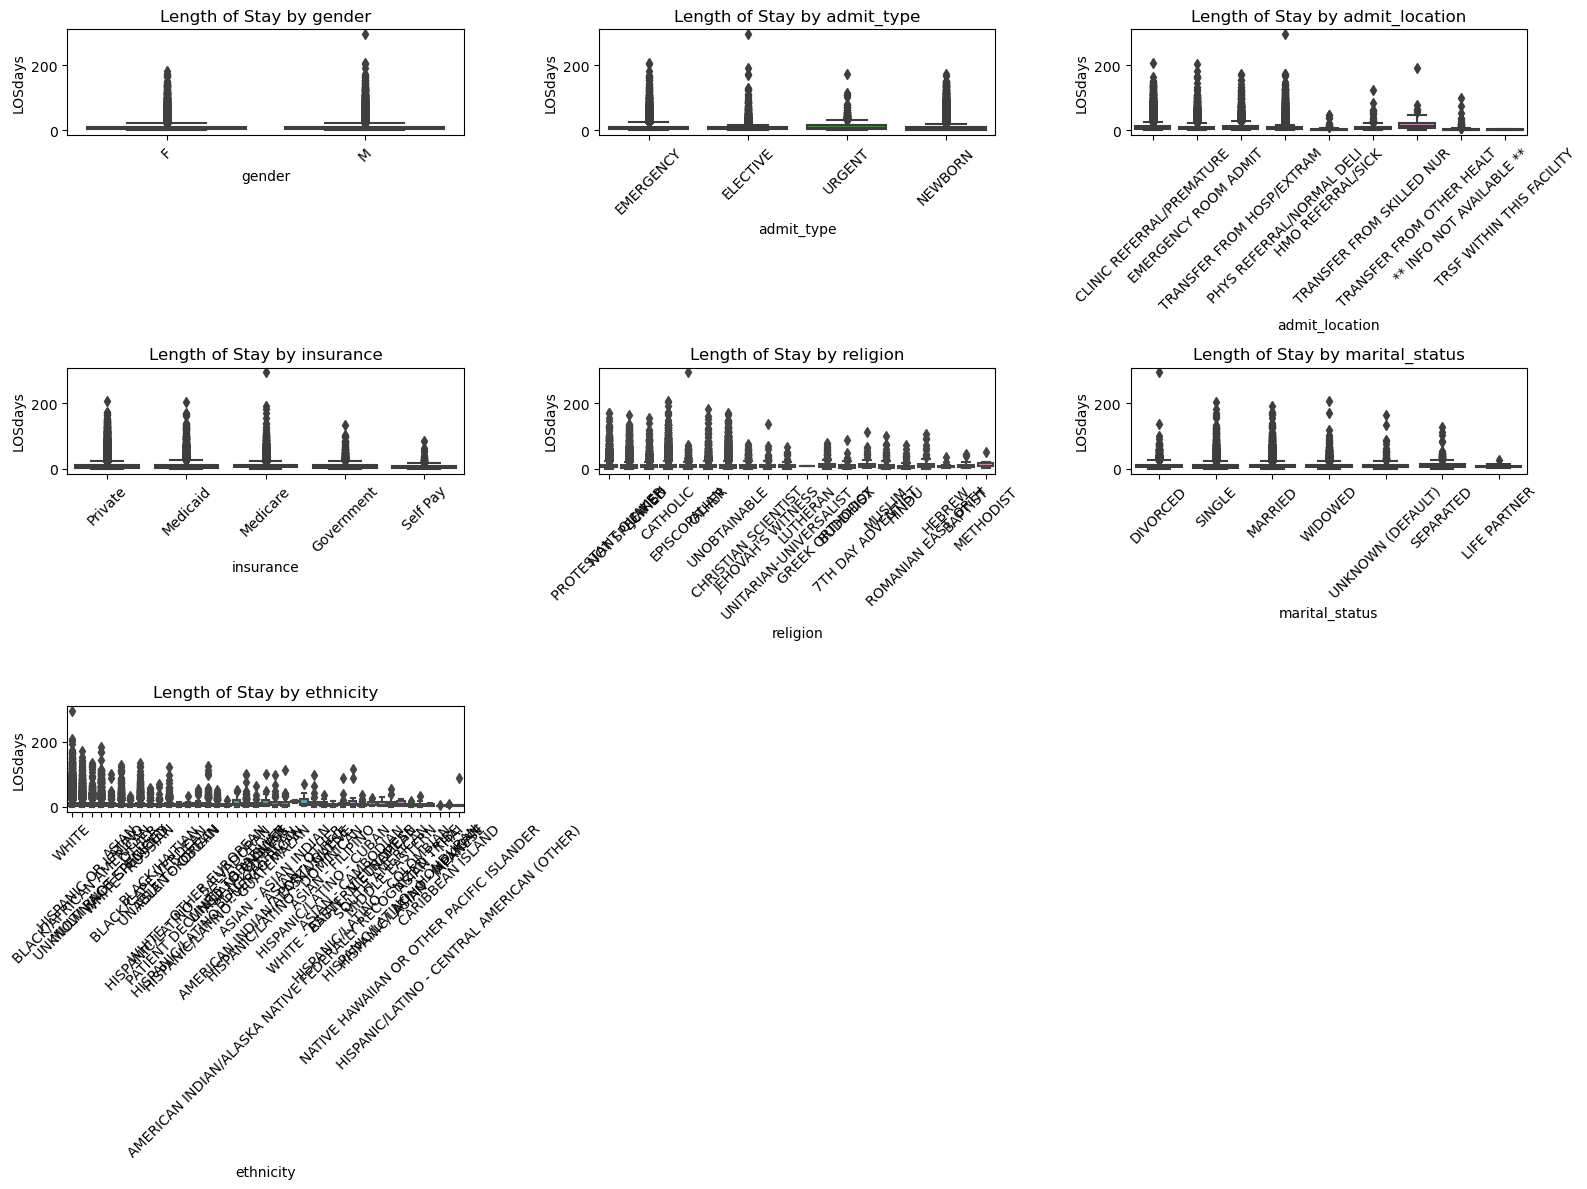

In [14]:
# Boxplots to visualize the relationship between categorical variables and LOSdays
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='LOSdays', data=df)
    plt.title(f'Length of Stay by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


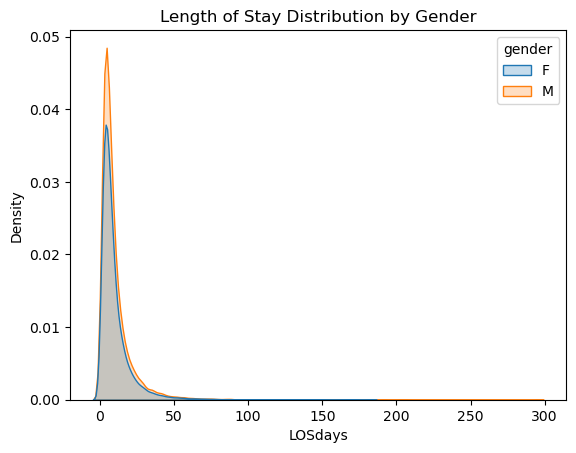

In [15]:
# KDE plots to visualize LOSdays distribution by gender
sns.kdeplot(data=df, x='LOSdays', hue='gender', fill=True)
plt.title('Length of Stay Distribution by Gender')
plt.show()

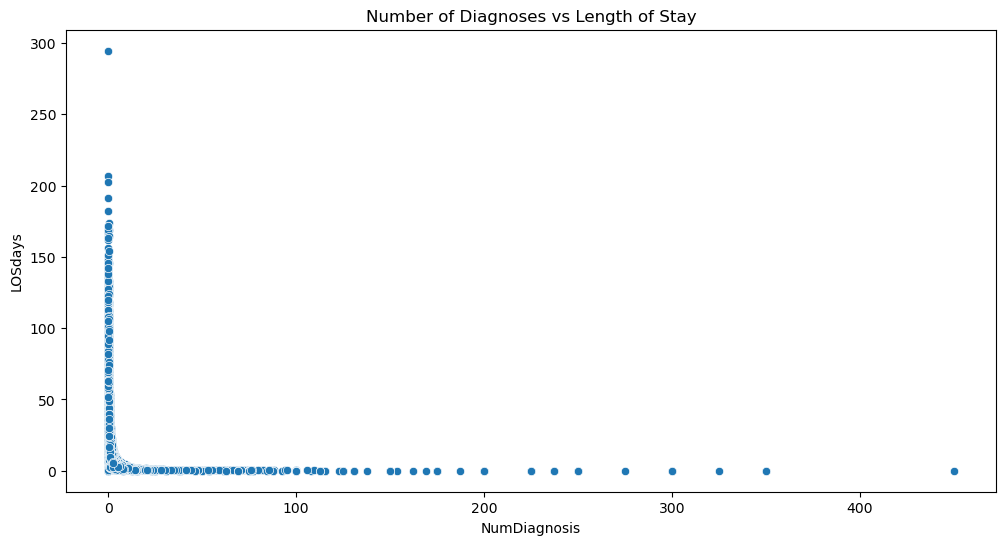

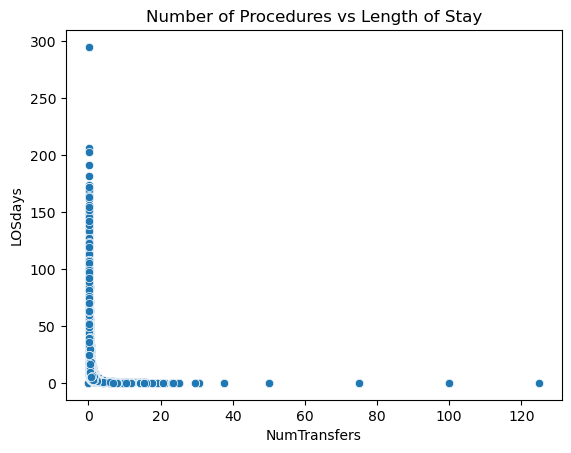

In [9]:
# Scatter plots to see relationship between number of diagnoses and procedures vs LOSdays
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='NumDiagnosis', y='LOSdays')
plt.title('Number of Diagnoses vs Length of Stay')
plt.show()

sns.scatterplot(data=df, x='NumTransfers', y='LOSdays')
plt.title('Number of Procedures vs Length of Stay')
plt.show()

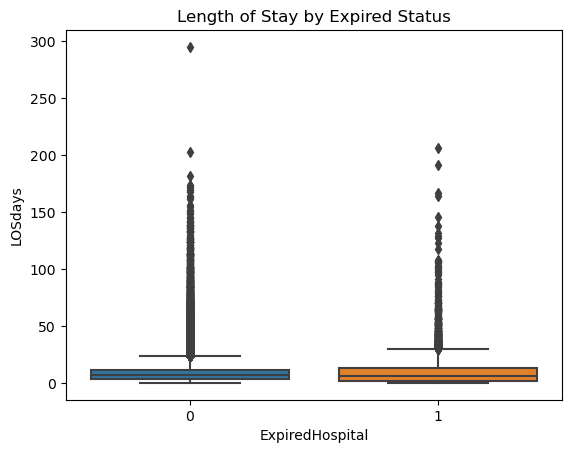

In [17]:
# Boxplot for LOSdays based on expired status
sns.boxplot(data=df, x='ExpiredHospital', y='LOSdays')
plt.title('Length of Stay by Expired Status')
plt.show()

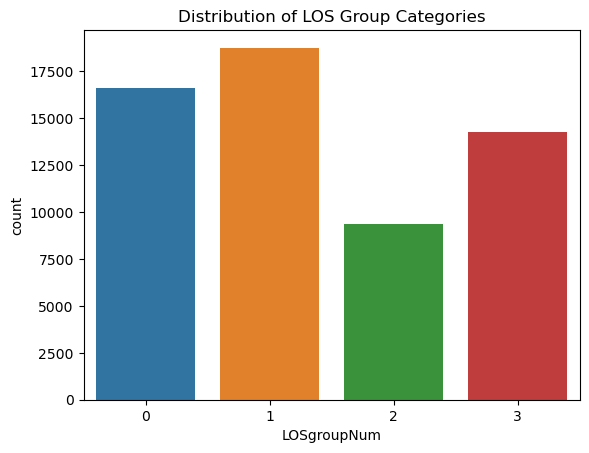

In [18]:
# Count plot of LOS group categories
sns.countplot(data=df, x='LOSgroupNum')
plt.title('Distribution of LOS Group Categories')
plt.show()